In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/HP/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.drop('User ID',inplace=True,axis=1)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0
...,...,...,...,...
395,Female,46.0,41000.0,1
396,Male,51.0,23000.0,1
397,Female,50.0,20000.0,1
398,Male,36.0,33000.0,0


In [10]:
df.shape

(400, 4)

In [11]:
df2=pd.get_dummies(df)

In [12]:
df2

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


In [13]:
df2.shape

(400, 5)

In [14]:
df2.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Female', 'Gender_Male'], dtype='object')

In [15]:
Y=df2['Purchased']

X=df2[['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']]

In [16]:
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,1,0
3,27.0,57000.0,1,0
4,19.0,76000.0,0,1
...,...,...,...,...
395,46.0,41000.0,1,0
396,51.0,23000.0,0,1
397,50.0,20000.0,1,0
398,36.0,33000.0,0,1


In [17]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(280, 4)
(120, 4)
(280,)
(120,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [21]:
from sklearn.svm import SVC
cls=SVC(kernel='linear',random_state=0,probability=True)
cls.fit(X_train,Y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [22]:
Y_pred=cls.predict(X_test)

In [23]:
Y_proba=cls.predict_proba(X_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
print(accuracy_score(Y_test,Y_pred))

0.8333333333333334


In [26]:
print(confusion_matrix(Y_test,Y_pred))

[[71  6]
 [14 29]]


In [27]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        77
           1       0.83      0.67      0.74        43

    accuracy                           0.83       120
   macro avg       0.83      0.80      0.81       120
weighted avg       0.83      0.83      0.83       120



In [28]:
Y_predicted=Y_proba[:,1]

In [29]:
Y_predicted

array([0.55712549, 0.41031813, 0.28689419, 0.01872618, 0.22807321,
       0.1569019 , 0.03502423, 0.94098316, 0.50773353, 0.26164174,
       0.06964849, 0.39714537, 0.67761481, 0.02712876, 0.09604536,
       0.83945544, 0.04852282, 0.08478282, 0.07451594, 0.14926025,
       0.04854402, 0.18461298, 0.00836656, 0.15832513, 0.09367658,
       0.40165099, 0.02453944, 0.97792013, 0.20536318, 0.44623312,
       0.42036674, 0.16596883, 0.46434865, 0.00327318, 0.21560354,
       0.71479746, 0.22132224, 0.38482845, 0.39839998, 0.44362245,
       0.28277989, 0.16406119, 0.25643206, 0.08138854, 0.96010513,
       0.03934979, 0.38275825, 0.89253663, 0.39787677, 0.25968132,
       0.40249197, 0.04505988, 0.91772167, 0.61784602, 0.9584677 ,
       0.25490212, 0.0256789 , 0.69546666, 0.03288238, 0.00832271,
       0.28669114, 0.21803023, 0.34367529, 0.98295449, 0.36325959,
       0.81029233, 0.24485782, 0.9798403 , 0.0878907 , 0.00786679,
       0.00355031, 0.79243484, 0.15404175, 0.09725415, 0.97169

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [31]:
fpr,tpr,threshold=roc_curve(Y_test,Y_predicted)

In [32]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9323467230443975


Text(0, 0.5, 'True positive rate (Sensitivity)')

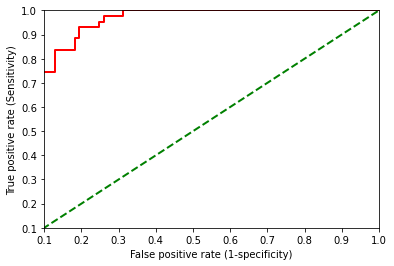

In [33]:

plt.plot(fpr,tpr,color='red',lw=2,label="ROC curve(area under curve=0.2%f)"%roc_auc)

plt.plot([0,1],[0,1],color='green',lw=2,linestyle='--')
plt.xlim([0.1,1.0])
plt.ylim([0.1,1.0])
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (Sensitivity)')